In [1]:
import argparse
import hashlib

from queryvolution.src.common import KeywordExtractor, generate_known_queries, setup_logger
from queryvolution.src.email_extraction import split_df, extract_sent_mail_contents, extract_apache_ml

from queryvolution.src.query_generator import QueryResultExtractor, ObfuscatedResultExtractor, PaddedResultExtractor
from queryvolution.src.matchmaker import KeywordTrapdoorMatchmaker

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcowindt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marcowindt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def number_of_combinations(n, r):
    import math
    f = math.factorial
    return f(n) / f(r) / f(n-r)

In [3]:
similar_voc_size = 64
server_voc_size = 64

artificial_keyword_size = 2

query_set_size = int(number_of_combinations(server_voc_size, artificial_keyword_size) * 0.15)

In [4]:
# Extract emails from a dataset
enron = extract_sent_mail_contents()
similar_docs, stored_docs = split_df(d_frame=enron, frac=0.4)

Reading the emails: 100%|██████████| 30109/30109 [00:18<00:00, 1671.48it/s]


In [5]:
## Extract keywords from similar dataset
similar_extractor = KeywordExtractor(
    corpus_df=similar_docs,
    voc_size=similar_voc_size,
    min_freq=1,
    with_artificial_kw_size=artificial_keyword_size
)

Extracting corpus vocabulary (Core 1):   0%|          | 0/3011 [00:00<?, ?it/s]

Extracting corpus vocabulary (Core 2):   0%|          | 0/3011 [00:00<?, ?it/s]


Extracting corpus vocabulary (Core 1):   0%|          | 9/3011 [00:00<00:43, 69.03it/s]


Extracting corpus vocabulary (Core 3):   0%|          | 4/3011 [00:00<01:23, 35.90it/s]

Extracting corpus vocabulary (Core 1):   0%|          | 12/3011 [00:00<01:08, 43.85it/s]

Extracting corpus vocabulary (Core 0):   1%|          | 20/3011 [00:00<01:16, 38.96it/s][A


Extracting corpus vocabulary (Core 3):   0%|          | 7/3011 [00:00<01:49, 27.52it/s]

Extracting corpus vocabulary (Core 1):   0%|          | 15/3011 [00:00<01:47, 27.77it/s]


Extracting corpus vocabulary (Core 3):   0%|          | 15/3011 [00:00<01:30, 32.99it/s]

Extracting corpus vocabulary (Core 1):   1%|          | 17/3011 [00:00<02:10, 22.98it/s]


Extracting corpus vocabulary (Core 0):   1%|▏         | 43/3011 [00:00<01:08, 43.21it/s]

Extracting corpus vocabu

Extracting corpus vocabulary (Core 0):  13%|█▎        | 396/3011 [00:08<00:39, 66.98it/s]

Extracting corpus vocabulary (Core 2):  13%|█▎        | 390/3011 [00:08<00:37, 70.36it/s]


Extracting corpus vocabulary (Core 1):  12%|█▏        | 348/3011 [00:08<00:40, 66.31it/s]

Extracting corpus vocabulary (Core 1):  12%|█▏        | 357/3011 [00:08<00:38, 69.19it/s]


Extracting corpus vocabulary (Core 3):  13%|█▎        | 386/3011 [00:08<00:46, 56.65it/s]

Extracting corpus vocabulary (Core 1):  12%|█▏        | 369/3011 [00:08<00:33, 79.13it/s]


Extracting corpus vocabulary (Core 1):  13%|█▎        | 385/3011 [00:09<00:28, 93.25it/s]

Extracting corpus vocabulary (Core 2):  14%|█▍        | 428/3011 [00:09<00:35, 72.74it/s]


Extracting corpus vocabulary (Core 1):  13%|█▎        | 397/3011 [00:09<00:26, 97.08it/s]


Extracting corpus vocabulary (Core 3):  14%|█▍        | 415/3011 [00:09<00:35, 73.97it/s]

Extracting corpus vocabulary (Core 1):  14%|█▎        | 411/3011 [00:09<00:25, 102.97

Extracting corpus vocabulary (Core 0):  28%|██▊       | 851/3011 [00:17<00:50, 42.75it/s]


Extracting corpus vocabulary (Core 3):  28%|██▊       | 845/3011 [00:17<00:52, 41.20it/s]

Extracting corpus vocabulary (Core 0):  28%|██▊       | 856/3011 [00:17<00:53, 40.37it/s]


Extracting corpus vocabulary (Core 3):  28%|██▊       | 853/3011 [00:17<00:50, 42.94it/s]

Extracting corpus vocabulary (Core 1):  25%|██▌       | 767/3011 [00:17<00:47, 47.55it/s]


Extracting corpus vocabulary (Core 0):  29%|██▉       | 867/3011 [00:17<00:49, 43.03it/s]

Extracting corpus vocabulary (Core 2):  29%|██▉       | 867/3011 [00:17<00:47, 45.33it/s]


Extracting corpus vocabulary (Core 0):  29%|██▉       | 873/3011 [00:18<00:45, 46.64it/s]

Extracting corpus vocabulary (Core 0):  29%|██▉       | 884/3011 [00:18<00:37, 56.21it/s]

Extracting corpus vocabulary (Core 2):  29%|██▉       | 879/3011 [00:18<00:43, 48.69it/s]


Extracting corpus vocabulary (Core 1):  26%|██▌       | 789/3011 [00:18<00:44, 50.28i

Extracting corpus vocabulary (Core 1):  38%|███▊      | 1132/3011 [00:25<00:40, 45.95it/s]


Extracting corpus vocabulary (Core 0):  40%|████      | 1205/3011 [00:25<01:04, 27.99it/s]


Extracting corpus vocabulary (Core 1):  38%|███▊      | 1138/3011 [00:25<00:44, 42.24it/s]

Extracting corpus vocabulary (Core 1):  38%|███▊      | 1146/3011 [00:25<00:39, 46.79it/s]

Extracting corpus vocabulary (Core 0):  40%|████      | 1219/3011 [00:26<00:47, 37.84it/s]


Extracting corpus vocabulary (Core 1):  38%|███▊      | 1155/3011 [00:26<00:34, 54.13it/s]

Extracting corpus vocabulary (Core 0):  41%|████      | 1227/3011 [00:26<00:40, 43.83it/s]


Extracting corpus vocabulary (Core 1):  39%|███▊      | 1163/3011 [00:26<00:31, 58.18it/s]

Extracting corpus vocabulary (Core 0):  41%|████      | 1234/3011 [00:26<00:39, 44.52it/s]


Extracting corpus vocabulary (Core 3):  41%|████      | 1238/3011 [00:26<00:37, 46.78it/s]

Extracting corpus vocabulary (Core 1):  39%|███▉      | 1185/3011 [00:26<00

Extracting corpus vocabulary (Core 1):  54%|█████▍    | 1621/3011 [00:33<00:22, 62.02it/s]

Extracting corpus vocabulary (Core 1):  54%|█████▍    | 1630/3011 [00:33<00:21, 64.55it/s]


Extracting corpus vocabulary (Core 0):  58%|█████▊    | 1738/3011 [00:33<00:18, 68.68it/s]


Extracting corpus vocabulary (Core 0):  58%|█████▊    | 1746/3011 [00:33<00:17, 71.72it/s]


Extracting corpus vocabulary (Core 3):  57%|█████▋    | 1703/3011 [00:33<00:30, 43.31it/s]

Extracting corpus vocabulary (Core 0):  58%|█████▊    | 1754/3011 [00:34<00:23, 54.60it/s]

Extracting corpus vocabulary (Core 0):  58%|█████▊    | 1761/3011 [00:34<00:22, 55.29it/s]


Extracting corpus vocabulary (Core 3):  57%|█████▋    | 1716/3011 [00:34<00:28, 45.91it/s]

Extracting corpus vocabulary (Core 1):  55%|█████▌    | 1660/3011 [00:34<00:26, 50.15it/s]


Extracting corpus vocabulary (Core 3):  57%|█████▋    | 1722/3011 [00:34<00:27, 47.60it/s]

Extracting corpus vocabulary (Core 1):  55%|█████▌    | 1668/3011 [00:34<00

Extracting corpus vocabulary (Core 1):  66%|██████▌   | 1990/3011 [00:42<00:19, 53.51it/s]

Extracting corpus vocabulary (Core 1):  66%|██████▋   | 2002/3011 [00:42<00:16, 61.72it/s]

Extracting corpus vocabulary (Core 2):  67%|██████▋   | 2026/3011 [00:42<00:22, 44.69it/s]


Extracting corpus vocabulary (Core 0):  70%|███████   | 2111/3011 [00:42<00:23, 38.99it/s]


Extracting corpus vocabulary (Core 0):  70%|███████   | 2121/3011 [00:42<00:19, 46.71it/s]

Extracting corpus vocabulary (Core 2):  68%|██████▊   | 2033/3011 [00:42<00:24, 39.42it/s]


Extracting corpus vocabulary (Core 1):  67%|██████▋   | 2019/3011 [00:43<00:19, 51.74it/s]

Extracting corpus vocabulary (Core 2):  68%|██████▊   | 2042/3011 [00:43<00:21, 44.60it/s]


Extracting corpus vocabulary (Core 0):  71%|███████   | 2134/3011 [00:43<00:19, 45.77it/s]

Extracting corpus vocabulary (Core 1):  67%|██████▋   | 2032/3011 [00:43<00:18, 53.81it/s]

Extracting corpus vocabulary (Core 2):  68%|██████▊   | 2054/3011 [00:43<00:

Extracting corpus vocabulary (Core 0):  82%|████████▏ | 2484/3011 [00:50<00:07, 66.51it/s]


Extracting corpus vocabulary (Core 1):  80%|████████  | 2412/3011 [00:50<00:11, 52.64it/s]

Extracting corpus vocabulary (Core 0):  83%|████████▎ | 2492/3011 [00:50<00:07, 67.62it/s]


Extracting corpus vocabulary (Core 3):  84%|████████▍ | 2523/3011 [00:50<00:05, 84.51it/s]

Extracting corpus vocabulary (Core 1):  81%|████████  | 2431/3011 [00:50<00:09, 63.67it/s]


Extracting corpus vocabulary (Core 0):  83%|████████▎ | 2512/3011 [00:50<00:07, 65.17it/s]

Extracting corpus vocabulary (Core 1):  81%|████████  | 2438/3011 [00:50<00:10, 56.30it/s]


Extracting corpus vocabulary (Core 0):  84%|████████▎ | 2520/3011 [00:50<00:08, 61.32it/s]

Extracting corpus vocabulary (Core 1):  81%|████████  | 2445/3011 [00:51<00:11, 49.55it/s]


Extracting corpus vocabulary (Core 3):  85%|████████▍ | 2550/3011 [00:51<00:07, 57.89it/s]

Extracting corpus vocabulary (Core 0):  84%|████████▍ | 2527/3011 [00:51<00

Extracting corpus vocabulary (Core 0):  96%|█████████▌| 2879/3011 [00:59<00:03, 41.87it/s]


Extracting corpus vocabulary (Core 0):  96%|█████████▌| 2886/3011 [00:59<00:02, 47.52it/s]

Extracting corpus vocabulary (Core 1):  92%|█████████▏| 2760/3011 [00:59<00:05, 47.80it/s]

Extracting corpus vocabulary (Core 1):  92%|█████████▏| 2767/3011 [00:59<00:04, 52.63it/s]


Extracting corpus vocabulary (Core 3):  97%|█████████▋| 2920/3011 [00:59<00:03, 24.66it/s]


Extracting corpus vocabulary (Core 3):  97%|█████████▋| 2929/3011 [00:59<00:02, 31.20it/s]

Extracting corpus vocabulary (Core 0):  96%|█████████▌| 2893/3011 [00:59<00:03, 33.41it/s]

Extracting corpus vocabulary (Core 0):  96%|█████████▌| 2898/3011 [00:59<00:03, 31.26it/s]

Extracting corpus vocabulary (Core 1):  92%|█████████▏| 2785/3011 [00:59<00:05, 41.00it/s]


Extracting corpus vocabulary (Core 1):  93%|█████████▎| 2790/3011 [01:00<00:05, 43.26it/s]

Extracting corpus vocabulary (Core 1):  93%|█████████▎| 2806/3011 [01:00<00:

In [6]:
# Extract keywords from real dataset
real_extractor = QueryResultExtractor(
    stored_docs,
    server_voc_size,
    min_freq=1,
    with_artificial_kw_size=artificial_keyword_size
)

Extracting corpus vocabulary (Core 1):   0%|          | 0/4516 [00:00<?, ?it/s]

Extracting corpus vocabulary (Core 1):   0%|          | 2/4516 [00:00<03:46, 19.93it/s]


Extracting corpus vocabulary (Core 0):   0%|          | 6/4517 [00:00<02:42, 27.74it/s]A

Extracting corpus vocabulary (Core 1):   0%|          | 5/4516 [00:00<03:30, 21.38it/s]


Extracting corpus vocabulary (Core 3):   0%|          | 12/4516 [00:00<00:38, 117.39it/s]

Extracting corpus vocabulary (Core 1):   0%|          | 7/4516 [00:00<03:39, 20.52it/s]


Extracting corpus vocabulary (Core 0):   0%|          | 19/4517 [00:00<02:01, 37.05it/s] 

Extracting corpus vocabulary (Core 2):   0%|          | 8/4516 [00:00<03:46, 19.86it/s]


Extracting corpus vocabulary (Core 1):   0%|          | 9/4516 [00:00<04:29, 16.74it/s]

Extracting corpus vocabulary (Core 0):   1%|          | 23/4517 [00:00<02:08, 34.93it/s]


Extracting corpus vocabulary (Core 1):   0%|          | 14/4516 [00:00<03:43, 20.10it/s]

Extracting corpus

Extracting corpus vocabulary (Core 1):   9%|▊         | 386/4516 [00:08<01:32, 44.88it/s]

Extracting corpus vocabulary (Core 2):  10%|█         | 464/4516 [00:08<01:28, 45.96it/s]


Extracting corpus vocabulary (Core 0):  14%|█▍        | 622/4517 [00:08<00:41, 93.04it/s]


Extracting corpus vocabulary (Core 0):  14%|█▍        | 640/4517 [00:08<00:35, 107.98it/s][A


Extracting corpus vocabulary (Core 3):  10%|▉         | 439/4516 [00:08<01:16, 53.17it/s]

Extracting corpus vocabulary (Core 0):  15%|█▍        | 661/4517 [00:08<00:31, 121.06it/s][A

Extracting corpus vocabulary (Core 0):  15%|█▌        | 682/4517 [00:08<00:27, 138.14it/s][A

Extracting corpus vocabulary (Core 2):  11%|█         | 482/4516 [00:08<01:28, 45.80it/s]


Extracting corpus vocabulary (Core 0):  15%|█▌        | 699/4517 [00:08<00:27, 139.19it/s][A

Extracting corpus vocabulary (Core 2):  11%|█         | 488/4516 [00:08<01:22, 48.91it/s]


Extracting corpus vocabulary (Core 1):   9%|▉         | 418/4516 [00:08<0

Extracting corpus vocabulary (Core 0):  28%|██▊       | 1268/4517 [00:16<01:02, 51.82it/s][A

Extracting corpus vocabulary (Core 2):  19%|█▊        | 843/4516 [00:16<01:39, 36.97it/s]


Extracting corpus vocabulary (Core 0):  28%|██▊       | 1274/4517 [00:16<01:00, 53.42it/s][A

Extracting corpus vocabulary (Core 2):  19%|█▉        | 848/4516 [00:16<01:32, 39.47it/s]


Extracting corpus vocabulary (Core 1):  18%|█▊        | 812/4516 [00:16<01:17, 48.00it/s]

Extracting corpus vocabulary (Core 0):  29%|██▊       | 1288/4517 [00:16<00:53, 60.66it/s][A


Extracting corpus vocabulary (Core 1):  18%|█▊        | 828/4516 [00:16<01:00, 60.68it/s]

Extracting corpus vocabulary (Core 0):  29%|██▊       | 1296/4517 [00:16<00:49, 64.55it/s][A


Extracting corpus vocabulary (Core 3):  20%|██        | 911/4516 [00:16<00:36, 98.32it/s]


Extracting corpus vocabulary (Core 1):  19%|█▊        | 838/4516 [00:16<01:05, 56.04it/s]


Extracting corpus vocabulary (Core 3):  21%|██        | 933/4516 [00:16<

Extracting corpus vocabulary (Core 1):  28%|██▊       | 1273/4516 [00:24<01:13, 44.24it/s]

Extracting corpus vocabulary (Core 2):  26%|██▌       | 1169/4516 [00:24<01:30, 36.95it/s]


Extracting corpus vocabulary (Core 1):  28%|██▊       | 1279/4516 [00:24<01:18, 41.18it/s]

Extracting corpus vocabulary (Core 0):  37%|███▋      | 1683/4517 [00:24<01:42, 27.62it/s]


Extracting corpus vocabulary (Core 1):  28%|██▊       | 1284/4516 [00:24<01:25, 37.96it/s]

Extracting corpus vocabulary (Core 1):  29%|██▊       | 1295/4516 [00:25<01:12, 44.65it/s]

Extracting corpus vocabulary (Core 2):  26%|██▌       | 1181/4516 [00:25<01:59, 27.86it/s]


Extracting corpus vocabulary (Core 0):  37%|███▋      | 1692/4517 [00:25<01:56, 24.19it/s]

Extracting corpus vocabulary (Core 2):  26%|██▌       | 1185/4516 [00:25<01:51, 29.88it/s]


Extracting corpus vocabulary (Core 0):  38%|███▊      | 1696/4517 [00:25<01:53, 24.94it/s]

Extracting corpus vocabulary (Core 0):  38%|███▊      | 1701/4517 [00:25<01:

Extracting corpus vocabulary (Core 1):  38%|███▊      | 1734/4516 [00:33<00:43, 64.16it/s]


Extracting corpus vocabulary (Core 3):  41%|████      | 1859/4516 [00:33<00:26, 99.89it/s]

Extracting corpus vocabulary (Core 1):  39%|███▊      | 1742/4516 [00:33<00:42, 64.80it/s]


Extracting corpus vocabulary (Core 0):  44%|████▎     | 1969/4517 [00:33<01:33, 27.11it/s]]

Extracting corpus vocabulary (Core 1):  39%|███▉      | 1753/4516 [00:33<00:37, 73.16it/s]


Extracting corpus vocabulary (Core 1):  39%|███▉      | 1762/4516 [00:33<00:36, 74.48it/s]

Extracting corpus vocabulary (Core 0):  44%|████▍     | 1977/4517 [00:33<01:27, 28.94it/s]


Extracting corpus vocabulary (Core 1):  39%|███▉      | 1771/4516 [00:34<00:37, 72.29it/s]

Extracting corpus vocabulary (Core 0):  44%|████▍     | 1981/4517 [00:34<01:24, 30.13it/s]


Extracting corpus vocabulary (Core 1):  39%|███▉      | 1779/4516 [00:34<00:37, 72.89it/s]

Extracting corpus vocabulary (Core 1):  40%|███▉      | 1791/4516 [00:34<0

Extracting corpus vocabulary (Core 0):  49%|████▉     | 2233/4517 [00:42<00:42, 53.91it/s]

Extracting corpus vocabulary (Core 2):  40%|███▉      | 1804/4516 [00:42<00:59, 45.76it/s]


Extracting corpus vocabulary (Core 1):  48%|████▊     | 2182/4516 [00:42<01:14, 31.33it/s]


Extracting corpus vocabulary (Core 3):  53%|█████▎    | 2400/4516 [00:42<00:31, 67.32it/s]

Extracting corpus vocabulary (Core 1):  48%|████▊     | 2188/4516 [00:42<01:04, 36.06it/s]

Extracting corpus vocabulary (Core 2):  40%|████      | 1821/4516 [00:42<00:48, 55.22it/s]


Extracting corpus vocabulary (Core 3):  53%|█████▎    | 2409/4516 [00:42<00:36, 57.96it/s]

Extracting corpus vocabulary (Core 1):  49%|████▊     | 2195/4516 [00:42<00:59, 39.21it/s]

Extracting corpus vocabulary (Core 2):  41%|████      | 1840/4516 [00:42<00:39, 67.64it/s]


Extracting corpus vocabulary (Core 3):  54%|█████▍    | 2429/4516 [00:42<00:28, 72.68it/s]

Extracting corpus vocabulary (Core 1):  49%|████▊     | 2200/4516 [00:43<01:

Extracting corpus vocabulary (Core 0):  56%|█████▌    | 2531/4517 [00:51<01:35, 20.86it/s]


Extracting corpus vocabulary (Core 3):  64%|██████▍   | 2908/4516 [00:51<00:33, 48.07it/s]

Extracting corpus vocabulary (Core 0):  56%|█████▌    | 2537/4517 [00:52<01:30, 21.82it/s]

Extracting corpus vocabulary (Core 2):  48%|████▊     | 2181/4516 [00:52<01:09, 33.72it/s]


Extracting corpus vocabulary (Core 0):  56%|█████▋    | 2541/4517 [00:52<01:18, 25.17it/s]

Extracting corpus vocabulary (Core 2):  48%|████▊     | 2190/4516 [00:52<00:58, 39.48it/s]


Extracting corpus vocabulary (Core 0):  56%|█████▋    | 2544/4517 [00:52<01:22, 24.05it/s]

Extracting corpus vocabulary (Core 2):  49%|████▊     | 2198/4516 [00:52<00:50, 45.45it/s]


Extracting corpus vocabulary (Core 0):  56%|█████▋    | 2550/4517 [00:52<01:07, 29.06it/s]

Extracting corpus vocabulary (Core 2):  49%|████▉     | 2204/4516 [00:52<00:47, 48.64it/s]


Extracting corpus vocabulary (Core 0):  57%|█████▋    | 2556/4517 [00:52<01

Extracting corpus vocabulary (Core 0):  61%|██████▏   | 2770/4517 [01:00<01:07, 25.99it/s]

Extracting corpus vocabulary (Core 2):  54%|█████▍    | 2459/4516 [01:00<01:43, 19.89it/s]


Extracting corpus vocabulary (Core 1):  57%|█████▋    | 2580/4516 [01:00<01:05, 29.43it/s]

Extracting corpus vocabulary (Core 2):  55%|█████▍    | 2464/4516 [01:00<01:26, 23.65it/s]


Extracting corpus vocabulary (Core 0):  61%|██████▏   | 2774/4517 [01:01<01:15, 23.06it/s]


Extracting corpus vocabulary (Core 3):  69%|██████▉   | 3134/4516 [01:00<00:50, 27.19it/s]

Extracting corpus vocabulary (Core 0):  62%|██████▏   | 2778/4517 [01:01<01:06, 26.17it/s]


Extracting corpus vocabulary (Core 3):  69%|██████▉   | 3138/4516 [01:01<00:48, 28.43it/s]

Extracting corpus vocabulary (Core 0):  62%|██████▏   | 2784/4517 [01:01<00:55, 30.97it/s]


Extracting corpus vocabulary (Core 3):  70%|██████▉   | 3142/4516 [01:01<00:44, 31.07it/s]

Extracting corpus vocabulary (Core 0):  62%|██████▏   | 2788/4517 [01:01<00

Extracting corpus vocabulary (Core 0):  68%|██████▊   | 3065/4517 [01:08<00:38, 37.44it/s]


Extracting corpus vocabulary (Core 0):  68%|██████▊   | 3072/4517 [01:08<00:33, 43.15it/s]

Extracting corpus vocabulary (Core 0):  68%|██████▊   | 3078/4517 [01:08<00:31, 46.41it/s]

Extracting corpus vocabulary (Core 1):  65%|██████▍   | 2914/4516 [01:08<00:27, 59.18it/s]


Extracting corpus vocabulary (Core 0):  68%|██████▊   | 3084/4517 [01:08<00:32, 43.44it/s]

Extracting corpus vocabulary (Core 1):  65%|██████▍   | 2934/4516 [01:09<00:21, 73.31it/s]


Extracting corpus vocabulary (Core 3):  75%|███████▍  | 3377/4516 [01:08<00:41, 27.65it/s]

Extracting corpus vocabulary (Core 0):  68%|██████▊   | 3089/4517 [01:09<00:42, 33.39it/s]

Extracting corpus vocabulary (Core 1):  65%|██████▌   | 2943/4516 [01:09<00:26, 58.99it/s]


Extracting corpus vocabulary (Core 0):  68%|██████▊   | 3094/4517 [01:09<00:43, 32.98it/s]

Extracting corpus vocabulary (Core 1):  65%|██████▌   | 2950/4516 [01:09<00:

Extracting corpus vocabulary (Core 1):  75%|███████▍  | 3383/4516 [01:16<00:20, 54.55it/s]

Extracting corpus vocabulary (Core 1):  75%|███████▌  | 3390/4516 [01:17<00:19, 56.50it/s]


Extracting corpus vocabulary (Core 0):  75%|███████▍  | 3382/4517 [01:17<00:28, 39.94it/s]

Extracting corpus vocabulary (Core 1):  75%|███████▌  | 3397/4516 [01:17<00:20, 55.62it/s]


Extracting corpus vocabulary (Core 3):  80%|████████  | 3626/4516 [01:17<00:29, 30.65it/s]

Extracting corpus vocabulary (Core 2):  72%|███████▏  | 3251/4516 [01:17<00:18, 67.22it/s]


Extracting corpus vocabulary (Core 0):  75%|███████▍  | 3387/4517 [01:17<00:34, 32.82it/s]

Extracting corpus vocabulary (Core 0):  75%|███████▌  | 3391/4517 [01:17<00:35, 31.69it/s]

Extracting corpus vocabulary (Core 0):  75%|███████▌  | 3396/4517 [01:17<00:32, 34.99it/s]


Extracting corpus vocabulary (Core 3):  81%|████████  | 3637/4516 [01:17<00:33, 26.32it/s]

Extracting corpus vocabulary (Core 0):  75%|███████▌  | 3400/4517 [01:17<00:

Extracting corpus vocabulary (Core 2):  81%|████████  | 3641/4516 [01:26<00:17, 50.42it/s]


Extracting corpus vocabulary (Core 1):  84%|████████▍ | 3786/4516 [01:26<00:10, 69.90it/s]


Extracting corpus vocabulary (Core 3):  92%|█████████▏| 4169/4516 [01:26<00:08, 40.89it/s]

Extracting corpus vocabulary (Core 1):  84%|████████▍ | 3795/4516 [01:26<00:10, 65.93it/s]


Extracting corpus vocabulary (Core 0):  82%|████████▏ | 3694/4517 [01:26<00:16, 49.51it/s]

Extracting corpus vocabulary (Core 0):  82%|████████▏ | 3702/4517 [01:26<00:14, 55.26it/s]


Extracting corpus vocabulary (Core 0):  82%|████████▏ | 3709/4517 [01:26<00:13, 58.70it/s]


Extracting corpus vocabulary (Core 3):  93%|█████████▎| 4198/4516 [01:26<00:05, 56.05it/s]

Extracting corpus vocabulary (Core 0):  82%|████████▏ | 3716/4517 [01:26<00:13, 61.19it/s]


Extracting corpus vocabulary (Core 3):  93%|█████████▎| 4207/4516 [01:26<00:05, 59.71it/s]

Extracting corpus vocabulary (Core 2):  81%|████████  | 3667/4516 [01:26<0

Extracting corpus vocabulary (Core 3):  98%|█████████▊| 4423/4516 [01:35<00:05, 15.67it/s]

Extracting corpus vocabulary (Core 1):  92%|█████████▏| 4161/4516 [01:35<00:11, 31.34it/s]

Extracting corpus vocabulary (Core 2):  90%|████████▉ | 4042/4516 [01:35<00:05, 87.26it/s]


Extracting corpus vocabulary (Core 0):  88%|████████▊ | 3994/4517 [01:35<00:18, 28.34it/s]

Extracting corpus vocabulary (Core 2):  90%|████████▉ | 4055/4516 [01:35<00:04, 93.54it/s]


Extracting corpus vocabulary (Core 1):  92%|█████████▏| 4169/4516 [01:35<00:11, 31.00it/s]


Extracting corpus vocabulary (Core 3):  98%|█████████▊| 4432/4516 [01:35<00:04, 18.31it/s]

Extracting corpus vocabulary (Core 0):  89%|████████▊ | 4002/4517 [01:35<00:17, 29.00it/s]

Extracting corpus vocabulary (Core 2):  90%|█████████ | 4076/4516 [01:35<00:05, 73.95it/s]


Extracting corpus vocabulary (Core 0):  89%|████████▊ | 4007/4517 [01:35<00:16, 30.27it/s]

Extracting corpus vocabulary (Core 1):  93%|█████████▎| 4181/4516 [01:35<00:

In [7]:
import matplotlib.pyplot as plt
import numpy as np

similar_keyword_counts = np.array([count for _kw, count in similar_extractor.sorted_voc_with_occ_original])
real_keyword_counts = np.array([count for _kw, count in real_extractor.sorted_voc_with_occ_original])

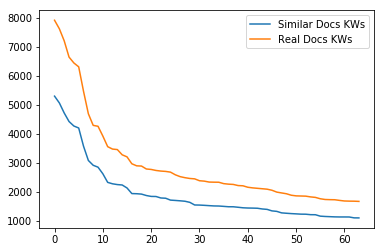

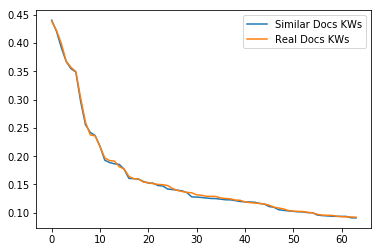

In [8]:
plt.plot(similar_keyword_counts, label="Similar Docs KWs")
plt.plot(real_keyword_counts, label="Real Docs KWs")
plt.legend()
plt.show()

plt.plot(similar_keyword_counts / len(similar_docs), label="Similar Docs KWs")
plt.plot(real_keyword_counts / len(stored_docs), label="Real Docs KWs")
plt.legend()
plt.show()

In [9]:
import tensorflow as tf

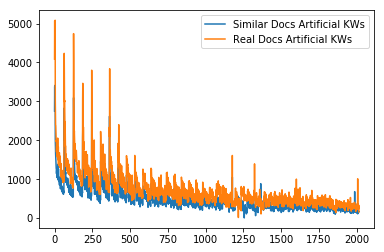

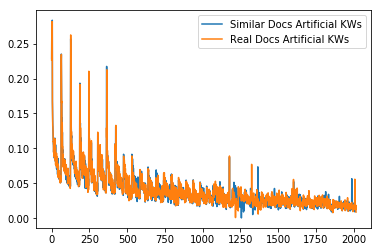

In [10]:
similar_column_sums = tf.reduce_sum(similar_extractor.occ_array, 0)
real_column_sums = tf.reduce_sum(real_extractor.occ_array, 0)

plt.plot(similar_column_sums, label="Similar Docs Artificial KWs")
plt.plot(real_column_sums, label="Real Docs Artificial KWs")
plt.legend()
plt.show()

plt.plot(similar_column_sums / len(similar_docs), label="Similar Docs Artificial KWs")
plt.plot(real_column_sums / len(stored_docs), label="Real Docs Artificial KWs")
plt.legend()
plt.show()

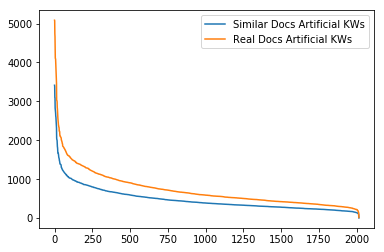

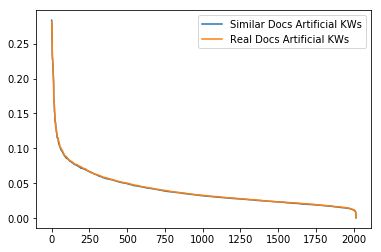

In [11]:
similar_column_sums = tf.sort(similar_column_sums, direction='DESCENDING')
real_column_sums = tf.sort(real_column_sums, direction='DESCENDING')

plt.plot(similar_column_sums, label="Similar Docs Artificial KWs")
plt.plot(real_column_sums, label="Real Docs Artificial KWs")
plt.legend()
plt.show()

plt.plot(similar_column_sums / len(similar_docs), label="Similar Docs Artificial KWs")
plt.plot(real_column_sums / len(stored_docs), label="Real Docs Artificial KWs")
plt.legend()
plt.show()

In [13]:
print(real_column_sums / len(stored_docs))

tf.Tensor([0.28153889 0.28087462 0.26249654 ... 0.00791586 0.00592306 0.00088569], shape=(2016,), dtype=float64)


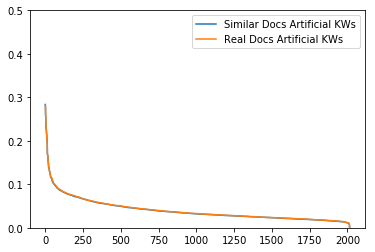

In [14]:
plt.plot(similar_column_sums / len(similar_docs), label="Similar Docs Artificial KWs")
plt.plot(real_column_sums / len(stored_docs), label="Real Docs Artificial KWs")
plt.ylim(top=0.5, bottom=0.0)
plt.legend()
plt.show()

In [16]:
y_sim = similar_column_sums / len(similar_docs)
y_real = real_column_sums/ len(stored_docs)

dx = tf.experimental.numpy.diff(
    tf.convert_to_tensor(
        list(range(1,int(number_of_combinations(server_voc_size, artificial_keyword_size)))
    ), dtype=tf.float64), n=1, axis=-1
)

dx = 0.001

dy_sim = tf.experimental.numpy.diff(
    y_sim, n=1, axis=-1
) / dx

dy_real = tf.experimental.numpy.diff(
    y_real, n=1, axis=-1
) / dx

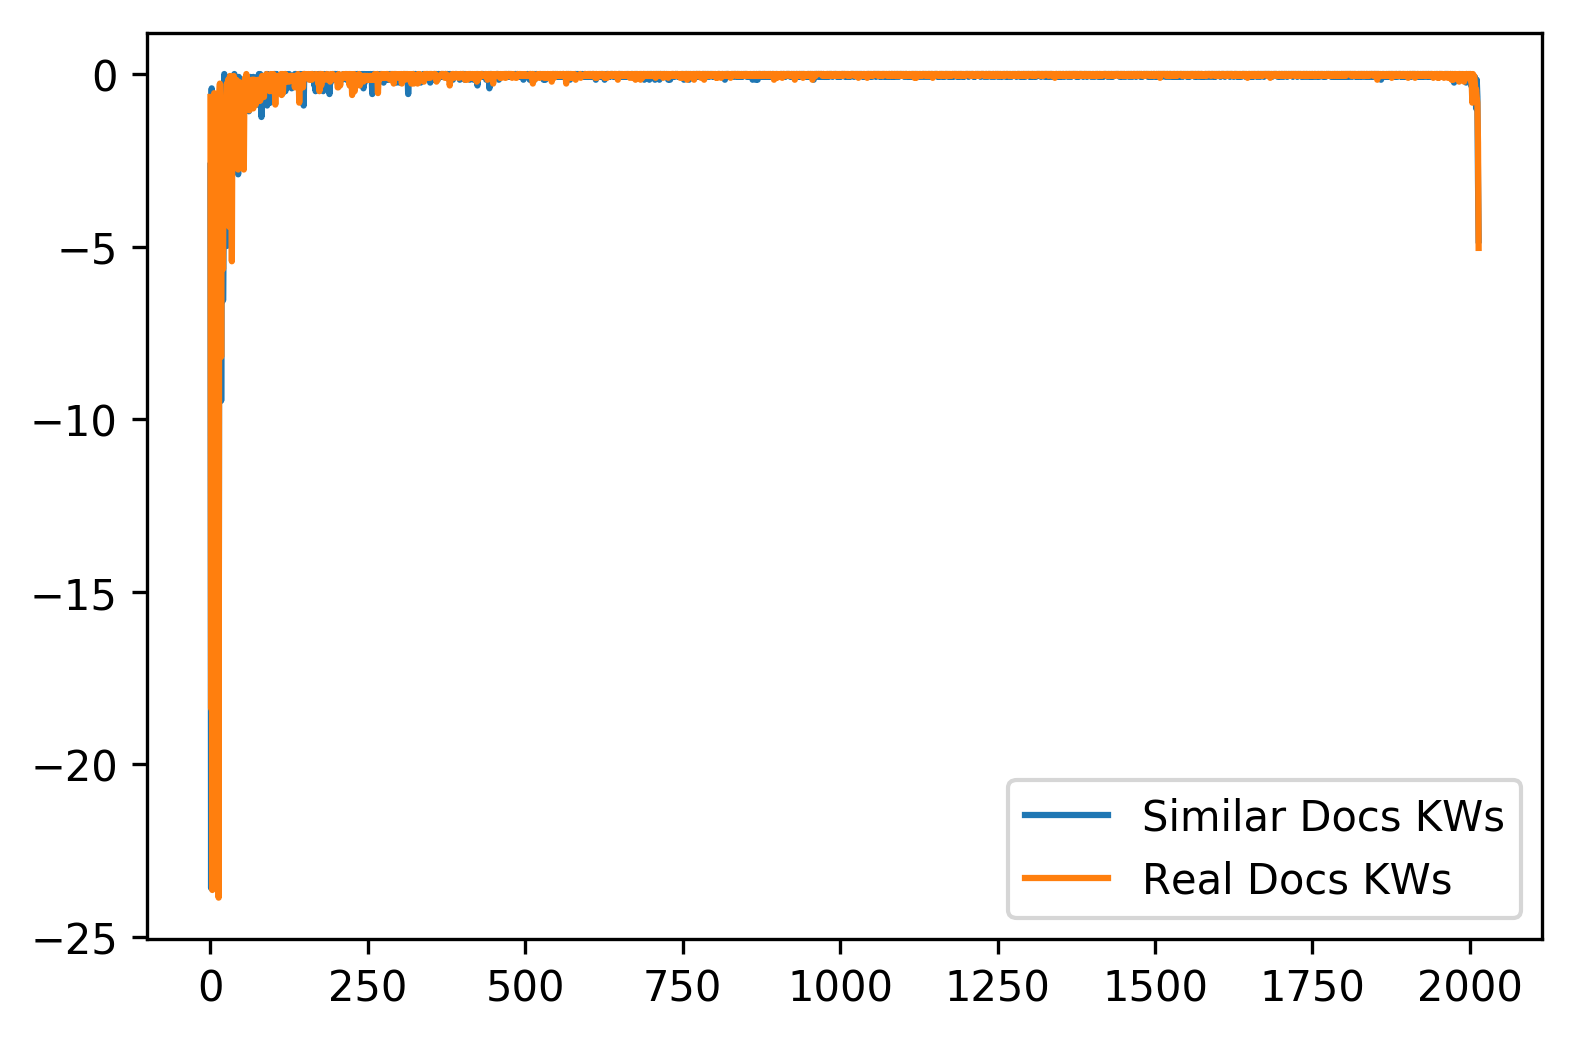

In [20]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
plt.plot(dy_sim, label="Similar Docs KWs")
plt.plot(dy_real, label="Real Docs KWs")
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


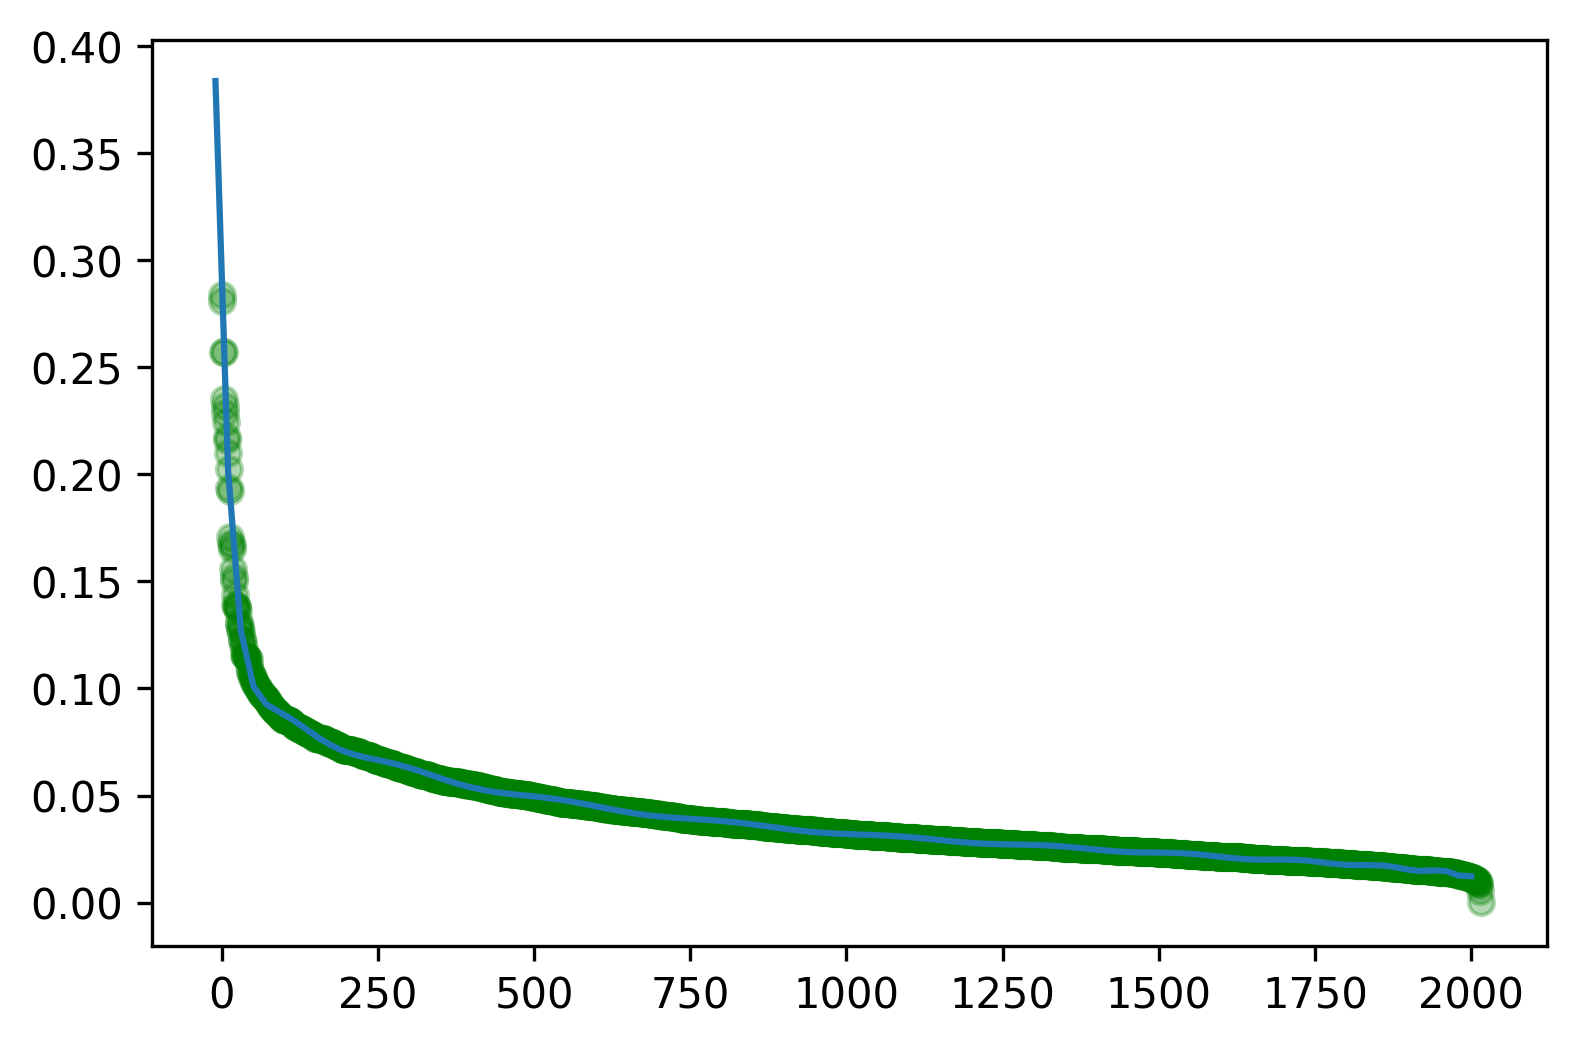

In [40]:
X_train = np.array(list(range(len(y_sim))))

mymodel = np.poly1d(np.polyfit(X_train, y_sim, 50))

myline = np.linspace(-10, 2000, 100)

# plt.scatter(X_train, y_train)
plt.plot(myline, mymodel(myline))
plt.scatter(X_train, y_sim, color='green', alpha=0.3)
plt.show()

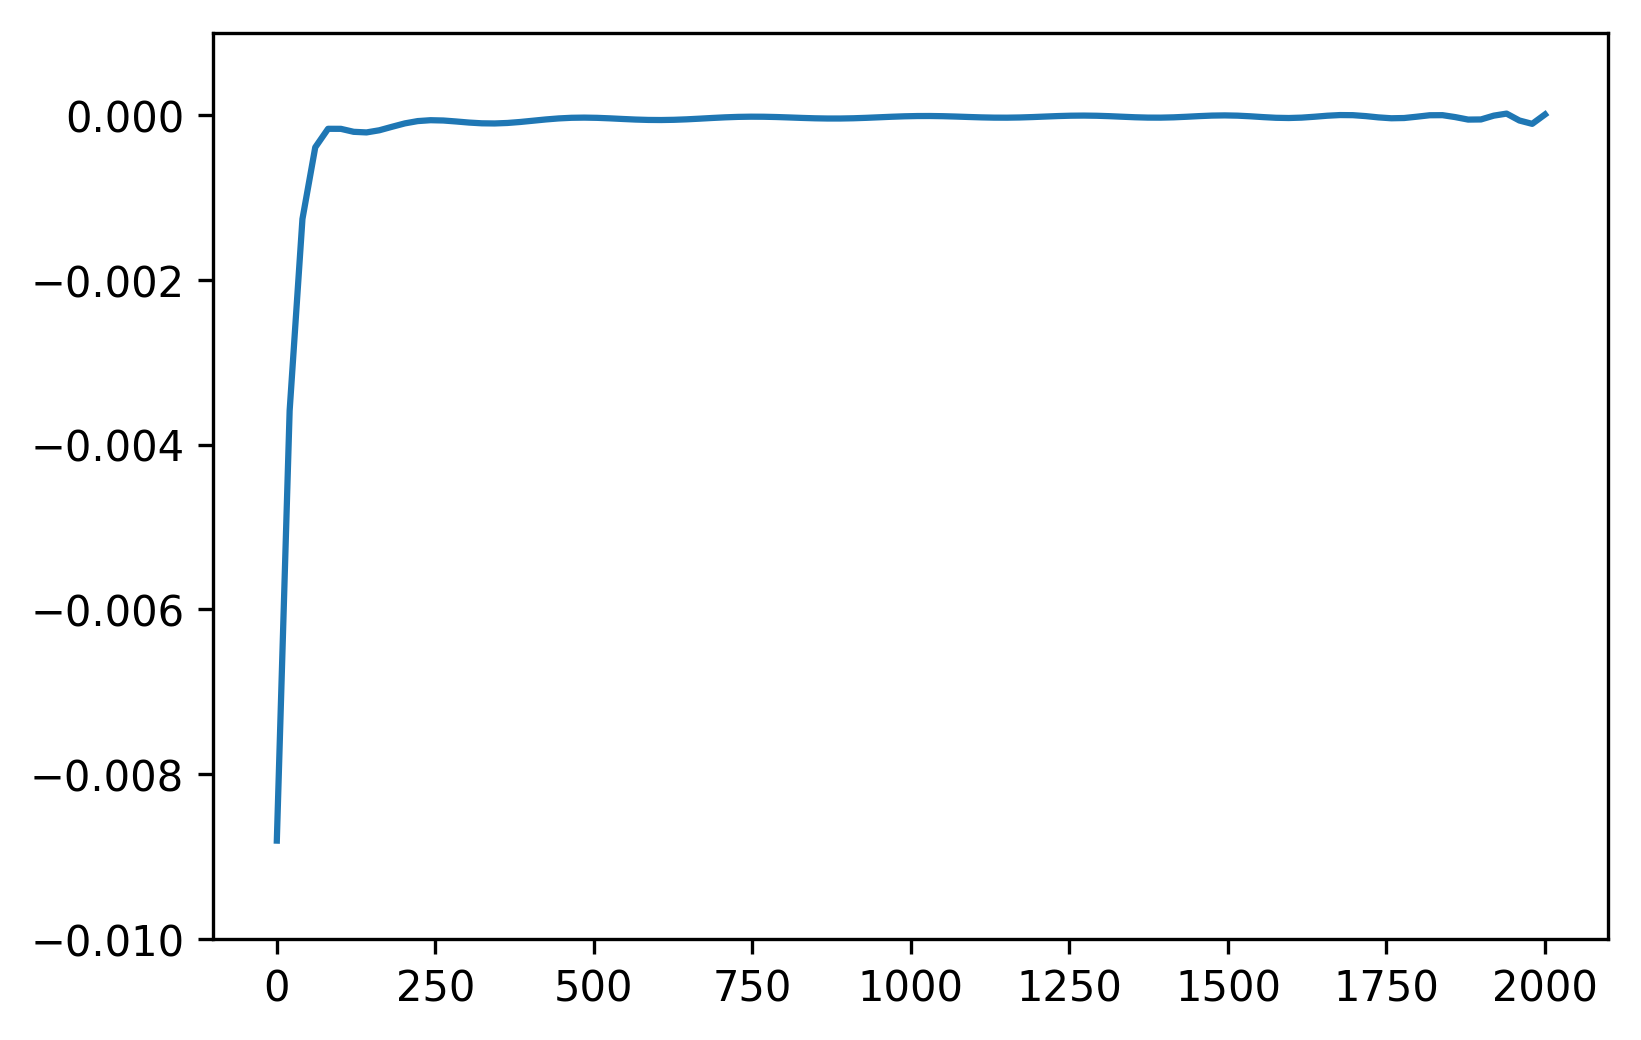

In [57]:
derivative = np.polyder(mymodel)
der_myline = np.linspace(0, 2000, 100)

# plt.scatter(X_train, y_train)
plt.plot(der_myline, derivative(der_myline))
# plt.scatter(X_train, y_sim, color='green', alpha=0.3)
plt.ylim(bottom=-0.010, top=0.001)
plt.show()

In [67]:
def func_log(x, a, b, c):
    """Return values from a log function."""
    return a*np.log2(b+x)+c

In [68]:
from scipy.optimize import curve_fit

In [69]:
popt, pcov = curve_fit(func_log, X_train, y_sim)
print("a = %s , b = %s, c = %s" % (popt[0], popt[1], popt[2]))

a = -0.018781777503223455 , b = 0.062293004828723623, c = 0.21926333534097334


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until


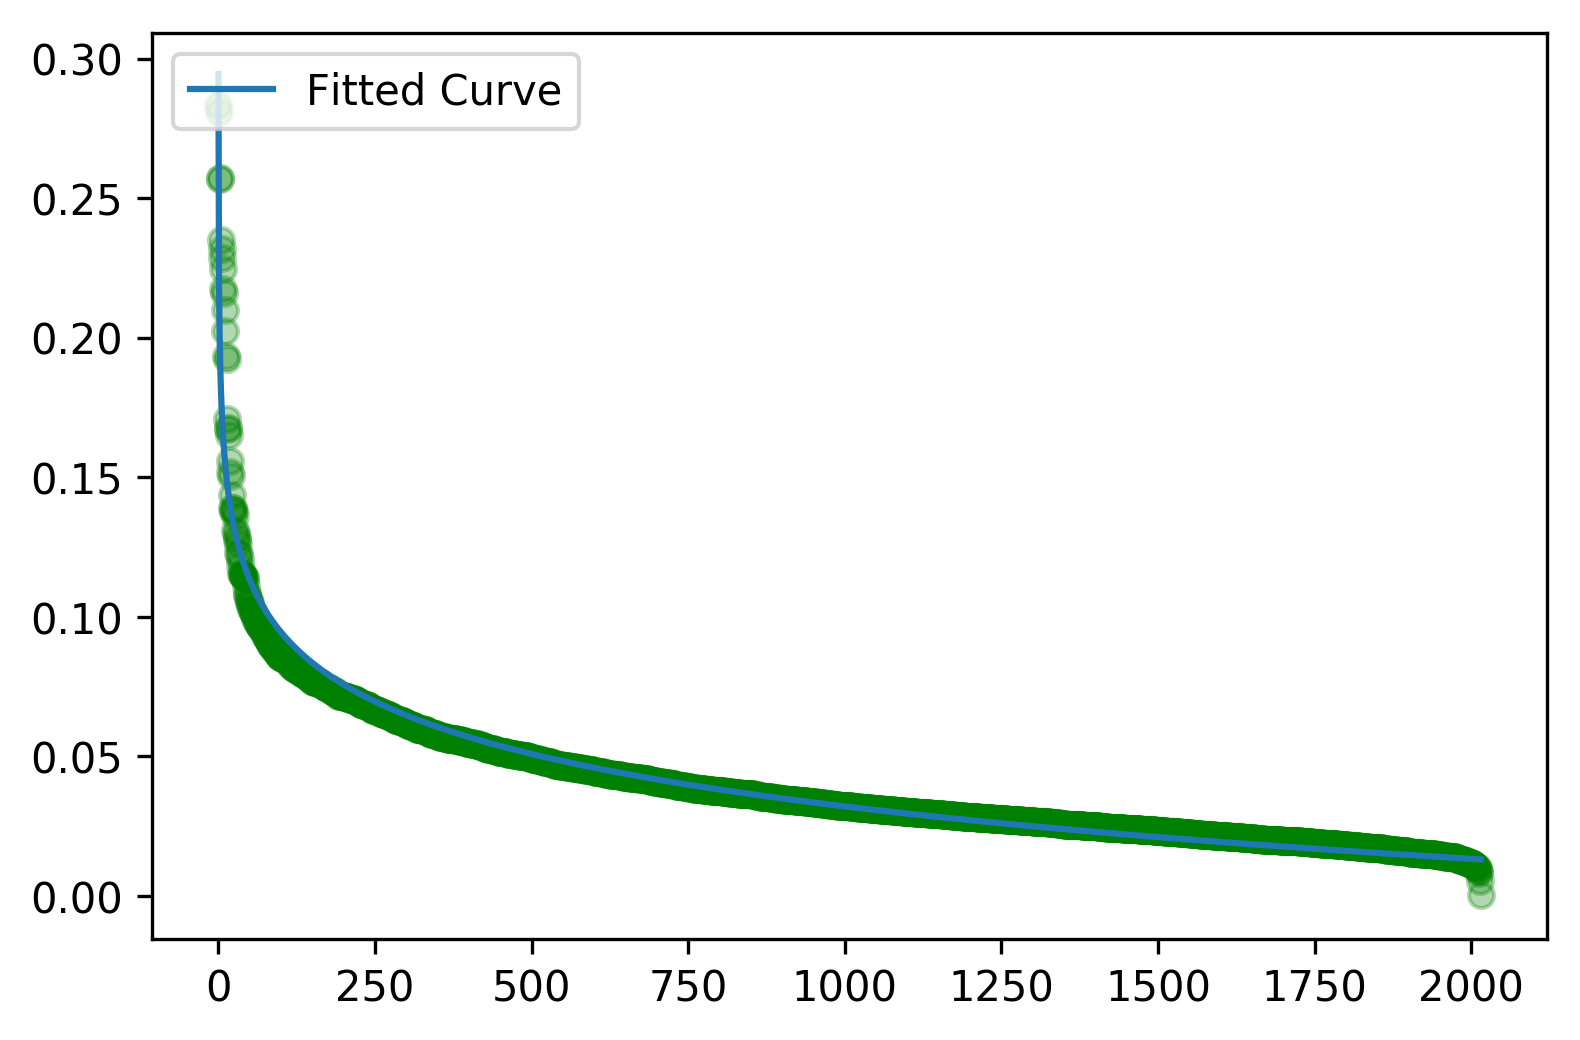

In [72]:
plt.plot(X_train, func_log(X_train, *popt), label="Fitted Curve") #same as line above \/
plt.scatter(X_train, y_sim, color='green', alpha=0.3)

plt.legend(loc='upper left')
plt.show()

In [74]:
def func_log_der(x, a, b, c):
    return a / ((b + x) * np.log(2))

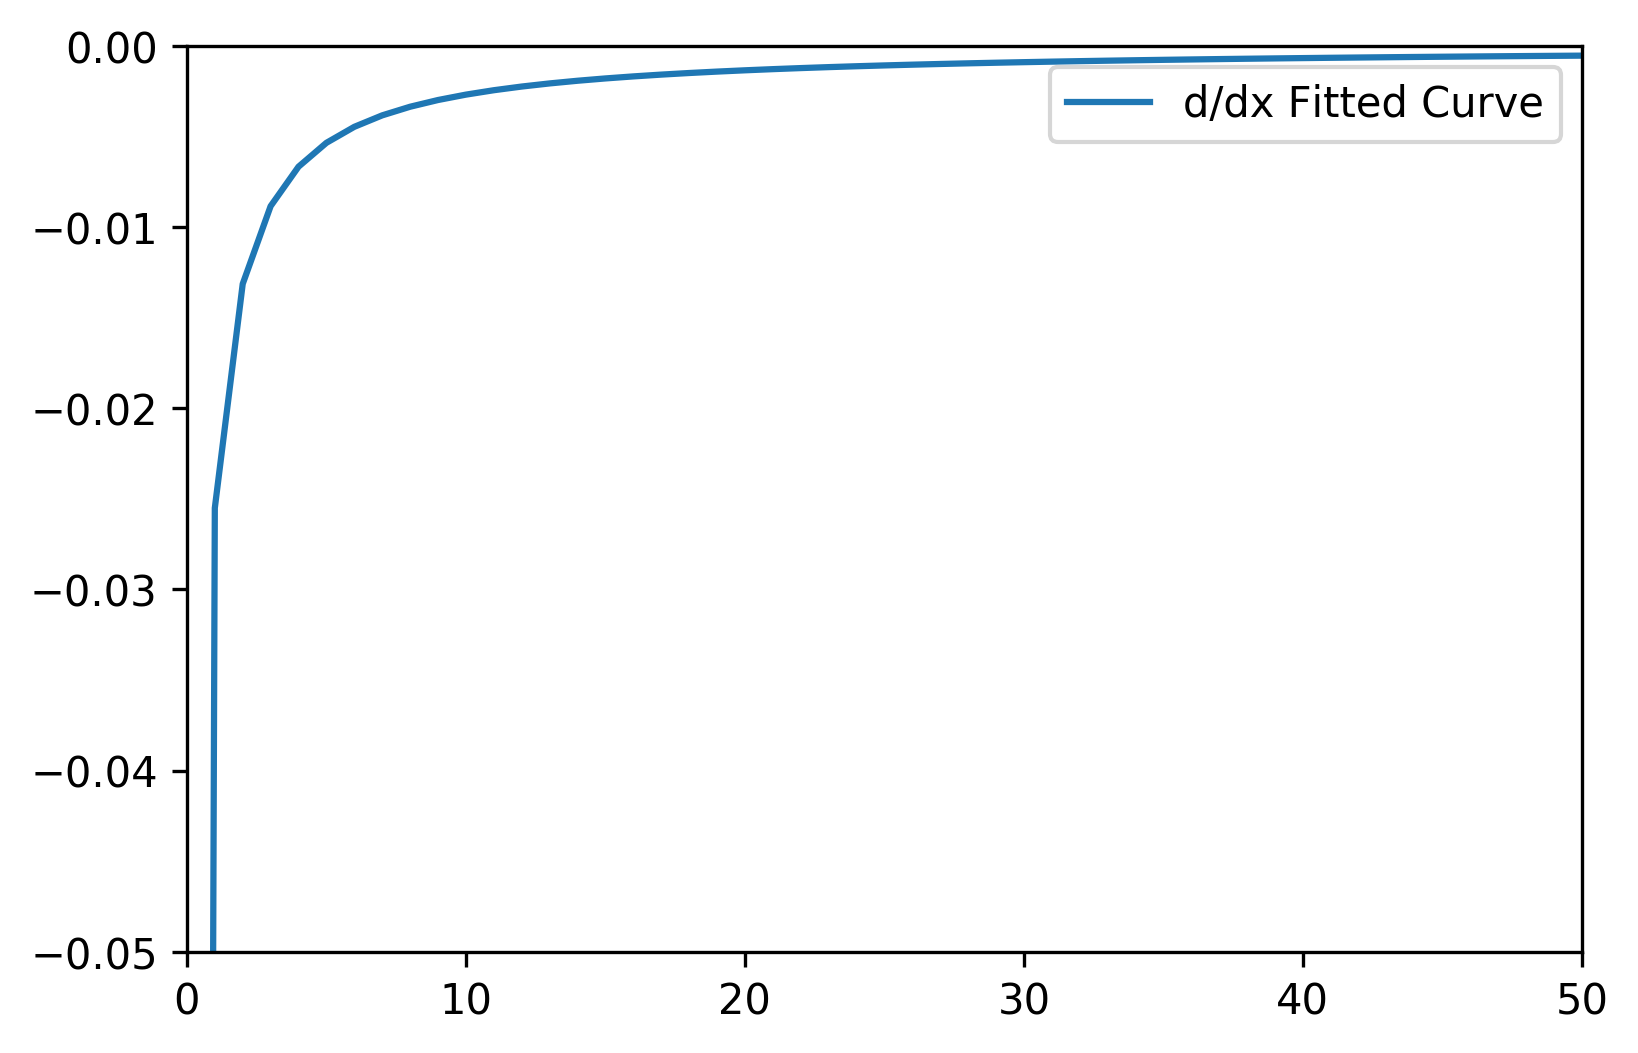

In [80]:
plt.plot(X_train, func_log_der(X_train, *popt), label="d/dx Fitted Curve") #same as line above \/
# plt.scatter(X_train, y_sim, color='green', alpha=0.3)
plt.ylim(bottom=-0.05, top=0)
plt.xlim(left=0, right=50)
plt.legend()
plt.show()

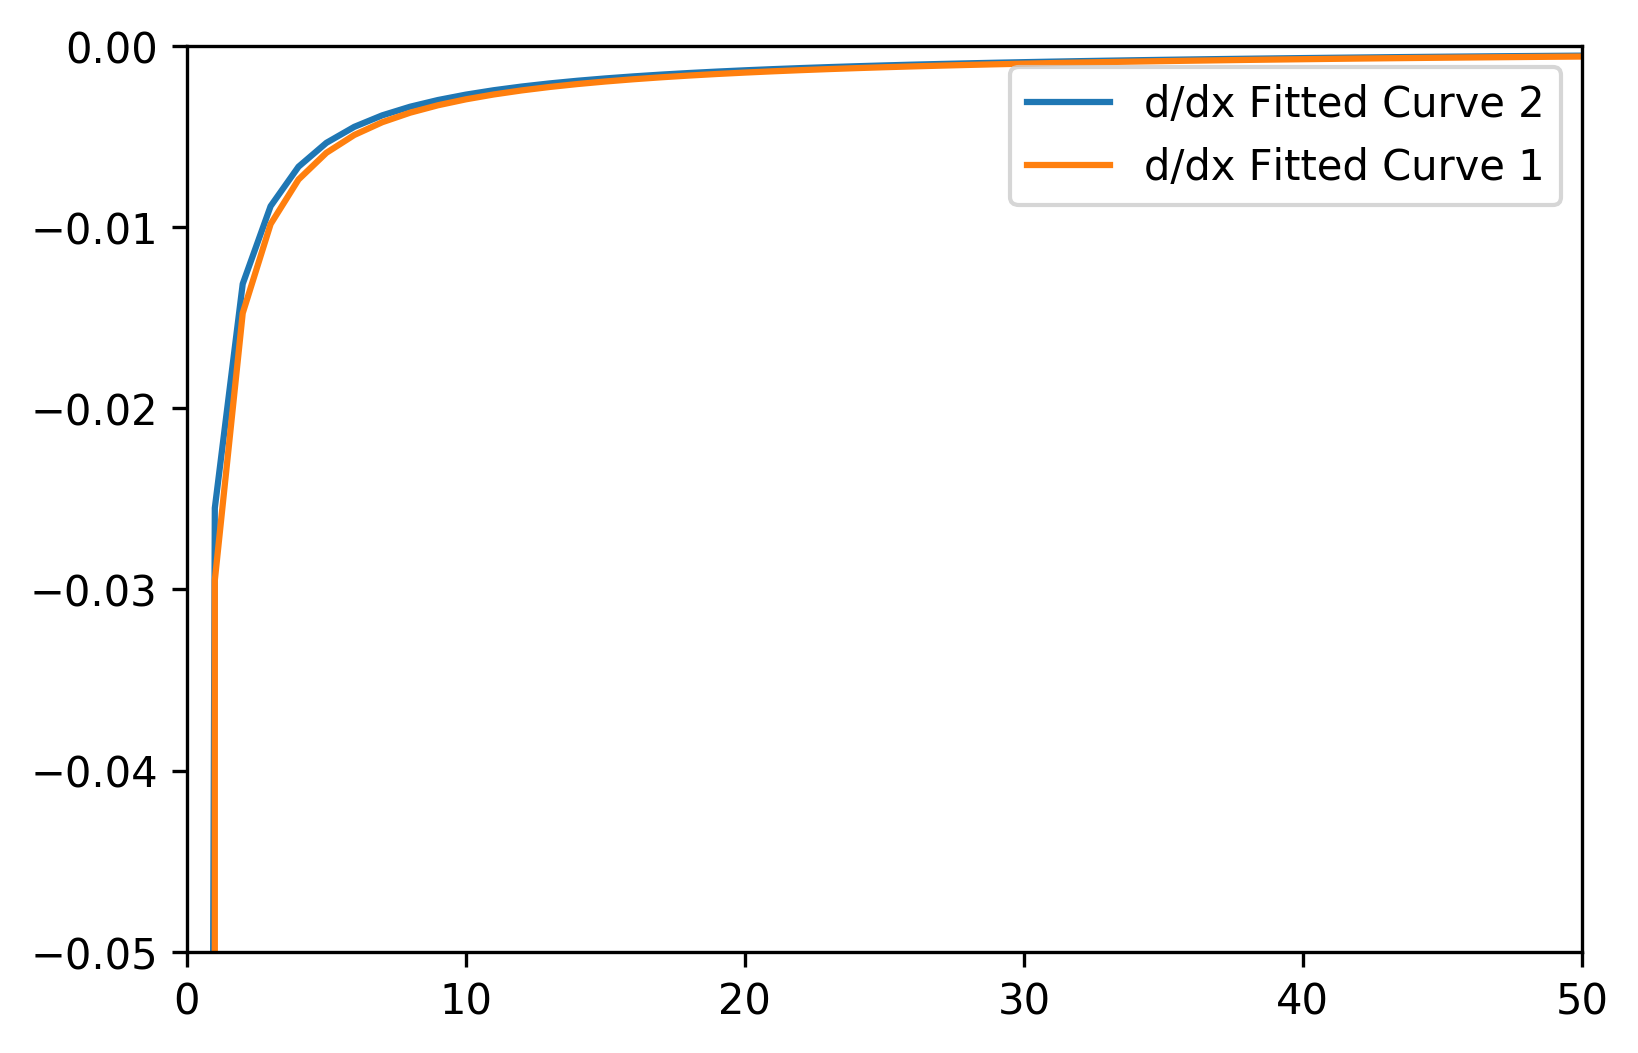

In [81]:
# Fitted vars from single keyword
aa = -0.02045888117643396
bb = 0.00046553683773366993
cc = 0.21691293643825443
xx = (aa, bb, cc)

plt.plot(X_train, func_log_der(X_train, *popt), label="d/dx Fitted Curve 2") #same as line above \/
plt.plot(X_train, func_log_der(X_train, *xx), label="d/dx Fitted Curve 1") #same as line above \/

plt.ylim(bottom=-0.05, top=0)
plt.xlim(left=0, right=50)
plt.legend()
plt.show()